In [1]:
import theano
import theano.tensor as T
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
x = T.dvector('x')
y = T.nnet.sigmoid(x)

In [4]:
J, updates = theano.scan(lambda i, y, x : T.grad(y[i], x), sequences=T.arange(y.shape[0]), non_sequences=[y, x])
f = theano.function([x], [y, T.sum(J,axis=1)], updates=updates)

In [5]:
x_data = np.arange(-10, 10, 0.01)
y_data, y_differential_data = f(x_data)

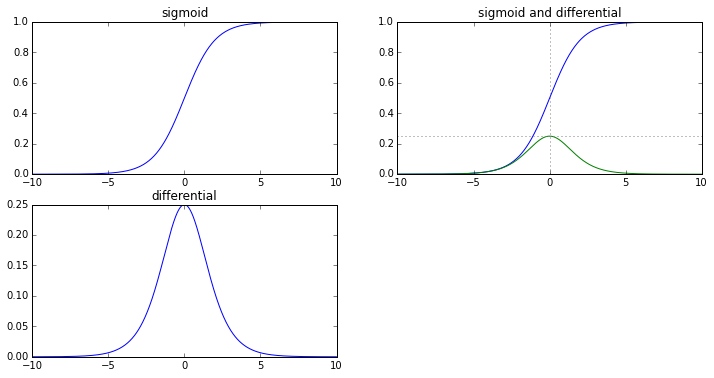

In [16]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(2,2,1)
plt.plot(x_data, y_data)
ax.set_title('sigmoid')

ax = plt.subplot(2,2,3)
plt.plot(x_data, y_differential_data)
ax.set_title('differential')

ax = plt.subplot(2,2,2)
plt.plot(x_data, y_data, label='sigmoid')
plt.plot(x_data, y_differential_data, label='sigmoid differential')
plt.axhline(y=0.25,ls=":",c="grey") # 添加水平直线
plt.axvline(x=0,ls=":",c="grey")    # 添加垂直直线
ax.set_title('sigmoid and differential')

plt.show()